In [82]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import retrieval_functions as rf
import importlib
importlib.reload(rf)
rf.init_plotting()

In [83]:
experiment = "01_Multiplication" # 506
experiment = "02_Compare" # 507|508|509
# experiment = "03_Share"
# experiment = "04_LogReg" # 526|527|528
# experiment = "05_Reveal" # 512
# experiment = "06_LeNet" # 529|530|531
experiment = "07_Aes" # 525
# experiment = "08_SecureMean" # 519
# experiment = "09_SecureMin" # 516|517|518
# experiment = "10_PSI" # 520
experiment = "11_Auction" # 521|522|523
# experiment = "12_VGG" # 532|533|534
# experiment = "15_BitAND" # 524
# experiment = "16_Division" # 510

framworks = ["HPMPC", "mp-slice", "MP-SPDZ"]
# framworks = ["MPyC", "HPMPC", "mp-slice", "MP-SPDZ"]

data = []
base = "./results/Deviation/"
for framework in framworks:
    path= base + framework + "/" + experiment+"/data/short_results.csv"
    frame=pd.read_csv(path ,header=0,sep=';',index_col=False,engine='python')
    frame['framework']=framework
    if framework=="MPyC":
        # assuming your dataframe is df and the time column is 'time'
        frame['runtime_internal(s)'] = pd.to_datetime(frame['runtime_internal(s)'], format='%H:%M:%S.%f').dt.time

        # convert time to seconds
        frame['runtime_internal(s)'] = frame['runtime_internal(s)'].apply(lambda t: t.hour*3600 + t.minute*60 + t.second + t.microsecond*1e-6)
        frame['peakRAM(MiB)']= frame['peakRAM(MiB)']
    elif framework=="HPMPC" or framework=="mp-slice":
        factor = 1
        if frame['splitroles'].max() == 1:
            factor = 6	
        elif frame['splitroles'].max() == 2:
            factor = 24
        else:
            factor=1
        frame['runtime_external(s)'] = pd.to_numeric(frame['runtime_external(s)'])* frame['threads'].max()*factor
    data.append(frame)

In [84]:
import pandas as pd


In [85]:
# fl_paths[-1].split("/")[-2]

In [86]:
# runtime/3600

# inputs,label=rf.get_input_deviation(data)
# rf.plot_deviation(inputs,label,"test.png",experiment,"Input size","Runtime [s]",True)

min bandwidths(Mbs)
100      0.020000
1000     0.016000
10000    0.017000
25000    0.015667
Name: runtime_external(s), dtype: float64
min bandwidths(Mbs)
100      0.014
1000     0.013
10000    0.011
25000    0.011
Name: runtime_external(s), dtype: float64
min bandwidths(Mbs)
100      0.010000
1000     0.011667
10000    0.010500
25000    0.009750
Name: runtime_external(s), dtype: float64
min bandwidths(Mbs)
0        0.1755
100      0.1970
1000     0.1510
10000    0.1570
25000    0.1660
Name: runtime_external(s), dtype: float64
min bandwidths(Mbs)
0        0.1115
100      0.1230
1000     0.1050
10000    0.1120
25000    0.1110
Name: runtime_external(s), dtype: float64
min bandwidths(Mbs)
0        0.100
100      0.134
1000     0.111
10000    0.103
25000    0.102
Name: runtime_external(s), dtype: float64
500
min bandwidths(Mbs)
100      1.621
1000     1.045
10000    1.040
25000    1.045
Name: runtime_external(s), dtype: float64
50
min Series([], Name: runtime_external(s), dtype: float64)
50

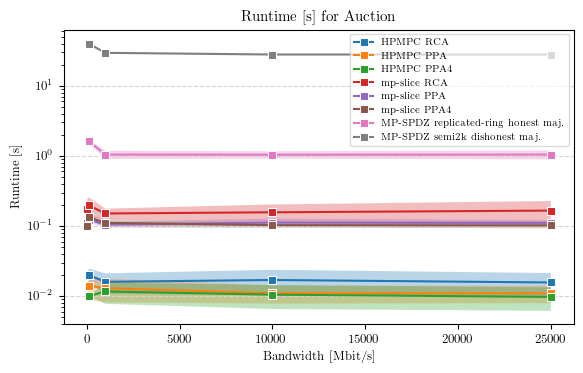

In [87]:
bandwidth,label=rf.get_bandwidth_deviation(data)
del bandwidth[-2] # Auction
del bandwidth[-2]
del label[-2]
del label[-2]

# del bandwidth[3] # DIVISION
# del bandwidth[3]
# del label[3]
# del label[3]

# del bandwidth[-2] # secure min
# del bandwidth[-2]
# del label[-2]
# del label[-2]

label = ['HPMPC RCA', 'HPMPC PPA', 'HPMPC PPA4', 'mp-slice RCA', 'mp-slice PPA', 'mp-slice PPA4', 'MP-SPDZ replicated-ring honest maj.', 'MP-SPDZ semi2k dishonest maj.']


print(label)
rf.plot_deviation(bandwidth,label,"test.png",experiment,"Bandwidth [Mbit/s]","Runtime [s]",True)

min Series([], Name: runtime_external(s), dtype: float64)
min latencies(ms)
0     0.015667
25    1.742000
50    3.469000
75    5.192000
Name: runtime_external(s), dtype: float64
min Series([], Name: runtime_external(s), dtype: float64)
min latencies(ms)
0     0.011
25    0.485
50    0.956
75    1.434
Name: runtime_external(s), dtype: float64
min Series([], Name: runtime_external(s), dtype: float64)
min latencies(ms)
0     0.00975
25    0.33300
50    0.65700
75    0.98100
Name: runtime_external(s), dtype: float64
min latencies(ms)
0       0.172333
25     35.151000
50     69.928000
75    104.708000
Name: runtime_external(s), dtype: float64
min latencies(ms)
0      0.111333
25     8.751000
50    17.327000
75    25.897000
Name: runtime_external(s), dtype: float64
min latencies(ms)
0      0.100667
25     5.691000
50    11.241000
75    16.843000
Name: runtime_external(s), dtype: float64
500
min latencies(ms)
0       1.045000
25     45.032727
50     88.683000
75    132.254000
Name: runtime_ex

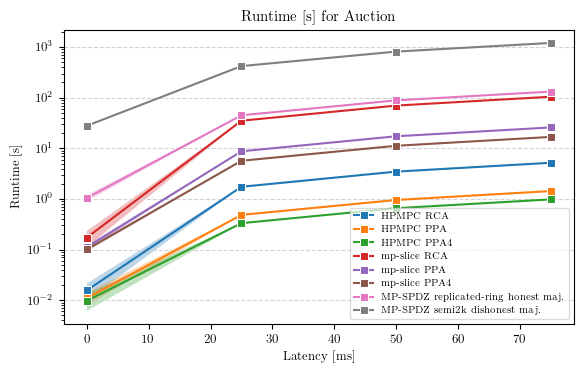

In [88]:
latency,label=rf.get_latency_deviation(data)
del latency[0] # AUCTION
del latency[1]
del latency[2]
del latency[-2]
del latency[-2]
del label[0]
del label[1]
del label[2]
del label[-2]
del label[-2]

# del latency[3] # DIVISION
# del latency[3]
# del label[3]
# del label[3]

# del latency[-2] # secure min
# del latency[-2]
# del label[-2]
# del label[-2]

# del latency[-7] # LogReg
# del latency[-7]
# del latency[-7]
# del latency[-7]
# del latency[-7]
# del label[-7]
# del label[-7]
# del label[-7]
# del label[-7]
# del label[-7]

label = ['HPMPC RCA', 'HPMPC PPA', 'HPMPC PPA4', 'mp-slice RCA', 'mp-slice PPA', 'mp-slice PPA4', 'MP-SPDZ replicated-ring honest maj.', 'MP-SPDZ semi2k dishonest maj.']

print(label)
rf.plot_deviation(latency,label,"test.png",experiment,"Latency [ms]","Runtime [s]",True)

min packetdrops(%)
0.0    0.015667
1.0    0.468000
2.0    1.074000
5.0    1.971000
Name: runtime_external(s), dtype: float64
min packetdrops(%)
0.0    0.011
1.0    0.194
2.0    0.783
5.0    1.184
Name: runtime_external(s), dtype: float64
min packetdrops(%)
0.0    0.00975
1.0    0.11300
2.0    0.37300
5.0    1.18700
Name: runtime_external(s), dtype: float64
min packetdrops(%)
0     0.172333
1     6.112000
2    12.030000
5    33.202000
Name: runtime_external(s), dtype: float64
min packetdrops(%)
0    0.111333
1    1.246000
2    2.821000
5    7.705000
Name: runtime_external(s), dtype: float64
min packetdrops(%)
0    0.100667
1    1.369000
2    2.435000
5    5.204000
Name: runtime_external(s), dtype: float64
min packetdrops(%)
0     1.045
1     4.129
2     8.236
5    23.388
Name: runtime_external(s), dtype: float64
min Series([], Name: runtime_external(s), dtype: float64)
min Series([], Name: runtime_external(s), dtype: float64)
min packetdrops(%)
0     27.909667
1     59.960000
2    100.8

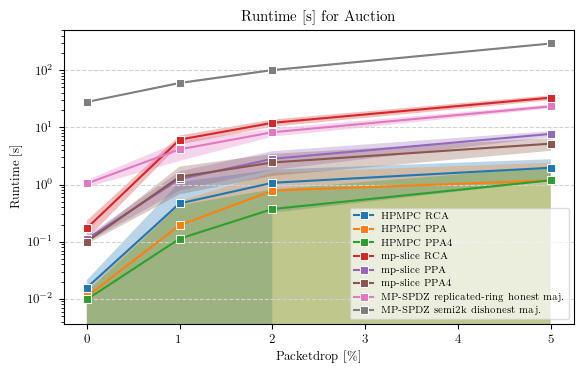

In [89]:
packetdrop,label=rf.get_packetdrop_deviation(data)
del packetdrop[-2] # Auction
del packetdrop[-2]
del label[-2]
del label[-2]

# del packetdrop[3] # Division
# del packetdrop[3]
# del label[3]
# del label[3]

# del packetdrop[-2] # secure min
# del packetdrop[-2]
# del label[-2]
# del label[-2]

label = ['HPMPC RCA', 'HPMPC PPA', 'HPMPC PPA4', 'mp-slice RCA', 'mp-slice PPA', 'mp-slice PPA4', 'MP-SPDZ replicated-ring honest maj.', 'MP-SPDZ semi2k dishonest maj.']

print(label)
rf.plot_deviation(packetdrop,label,"test.png",experiment,"Packetdrop [\\%]","Runtime [s]",True)

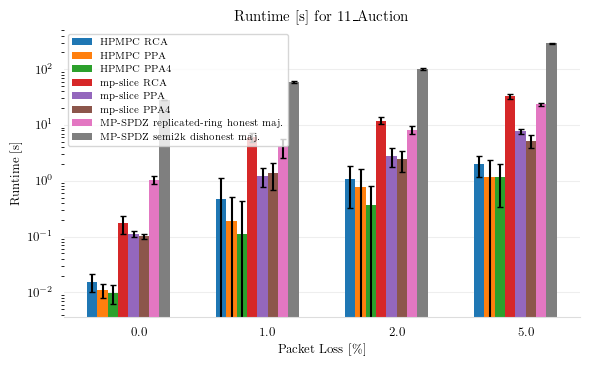

In [90]:
fig, ax = plt.subplots()
width = 0.4 # the width of the bars
ind = np.arange(4)*5  # Adjust the first parameter to center the bars

bar_list=[]
for i in range(len(packetdrop)):
    bar_list.append(ax.bar(ind - 1.8 + i * width, packetdrop[i]['mean'], width, yerr=packetdrop[i]['std'], label=label[i]))

# Add some text for labels, title and custom x-axis tick labels, etc.
#ax.set_yscale('log')
ax.set_ylabel('Runtime [s]')
ax.set_xlabel('Packet Loss [\\%]')
ax.set_title(f'Runtime [s] for {experiment}')
ax.set_xticks(ind)
ax.set_xticklabels((packetdrop[1]['packetdrops(%)']))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)

# Third, add a horizontal grid (but keep the vertical grid hidden).
# Color the lines a light gray as well.
ax.set_yscale('log')
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)
fig.tight_layout()
ax.legend()
ax.figure.set_size_inches(5.91, 3.5)
plt.savefig(experiment+'_packetdrop_bar.png',dpi=300, bbox_inches='tight')
plt.show()

In [91]:
bandwidth,label=rf.get_bandwidth_deviation(data)
del bandwidth[-2] # Auction
del bandwidth[-2]
del label[-2]
del label[-2]

# del bandwidth[3] # Division
# del bandwidth[3]
# del label[3]
# del label[3]

# del bandwidth[-2] # secure min
# del bandwidth[-2]
# del label[-2]
# del label[-2]
label = ['HPMPC RCA', 'HPMPC PPA', 'HPMPC PPA4', 'mp-slice RCA', 'mp-slice PPA', 'mp-slice PPA4', 'MP-SPDZ replicated-ring honest maj.', 'MP-SPDZ semi2k dishonest maj.']

print(label)
[df['mean'].iloc[0] for df in bandwidth]

min bandwidths(Mbs)
100      0.020000
1000     0.016000
10000    0.017000
25000    0.015667
Name: runtime_external(s), dtype: float64
min bandwidths(Mbs)
100      0.014
1000     0.013
10000    0.011
25000    0.011
Name: runtime_external(s), dtype: float64
min bandwidths(Mbs)
100      0.010000
1000     0.011667
10000    0.010500
25000    0.009750
Name: runtime_external(s), dtype: float64
min bandwidths(Mbs)
0        0.1755
100      0.1970
1000     0.1510
10000    0.1570
25000    0.1660
Name: runtime_external(s), dtype: float64
min bandwidths(Mbs)
0        0.1115
100      0.1230
1000     0.1050
10000    0.1120
25000    0.1110
Name: runtime_external(s), dtype: float64
min bandwidths(Mbs)
0        0.100
100      0.134
1000     0.111
10000    0.103
25000    0.102
Name: runtime_external(s), dtype: float64
500
min bandwidths(Mbs)
100      1.621
1000     1.045
10000    1.040
25000    1.045
Name: runtime_external(s), dtype: float64
50
min Series([], Name: runtime_external(s), dtype: float64)
50

[0.02,
 0.014000000000000002,
 0.01,
 0.17550000000000002,
 0.1115,
 0.1,
 1.621,
 39.928]

In [92]:
[df['mean'].iloc[0] for df in bandwidth]
[df['std'].iloc[0] for df in bandwidth]

[0.004714045207910317,
 0.0051639777949432225,
 0.0,
 0.061599299380841396,
 0.014964871146156009,
 0.009733285267845754,
 0.09700515450222218,
 0.9278864873104535]

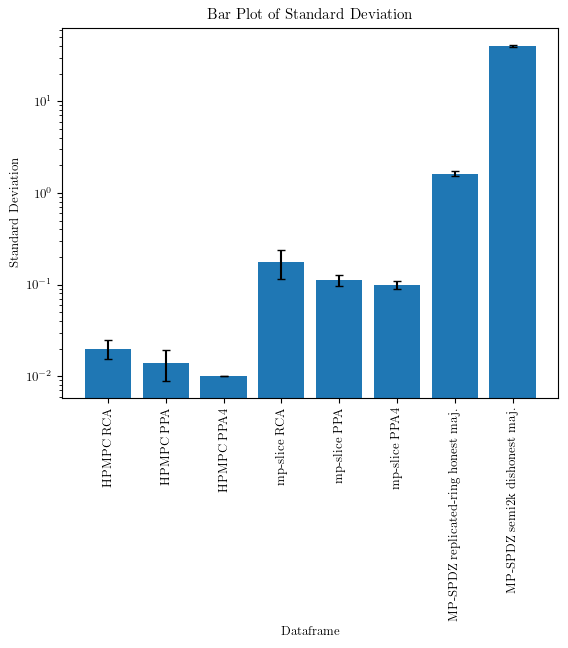

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extract the 'mean' and 'std' values separately
mean_values = [df['mean'].iloc[0] for df in bandwidth]
std_values = [df['std'].iloc[0] for df in bandwidth]

# Create a bar plot with 'mean' values as the height of the bars and 'std' values as standard deviation
fig, ax = plt.subplots()
ax.bar(label, mean_values,yerr=std_values,capsize=3)

plt.xticks(rotation='vertical')

# Add labels and title
plt.xlabel('Dataframe')
plt.ylabel('Standard Deviation')
plt.title('Bar Plot of Standard Deviation')

# Set y-axis to logarithmic scale
ax.set_yscale('log')

# Show the plot
plt.show()


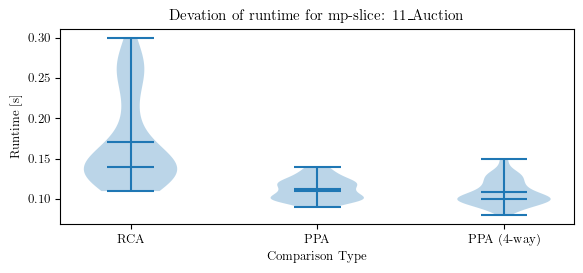

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt
# Example data
fig, ax = plt.subplots()

pos = 1
deviation61 = data[pos].loc[(data[pos]['function'] == 521) & (data[pos]['packetdrops(%)'] == 0) & (data[pos]['latencies(ms)'] == 0) & (data[pos]['preprocess']==0), ['runtime_external(s)']].values.flatten().tolist()
deviation62 = data[pos].loc[(data[pos]['function'] == 522)  & (data[pos]['packetdrops(%)'] == 0) & (data[pos]['latencies(ms)'] == 0) & (data[pos]['preprocess']==0), ['runtime_external(s)']].values.flatten().tolist()
deviation63 = data[pos].loc[(data[pos]['function'] == 523) & (data[pos]['packetdrops(%)'] == 0) & (data[pos]['latencies(ms)'] == 0) & (data[pos]['preprocess']==0), ['runtime_external(s)']].values.flatten().tolist()

# Plot the first violin plot
two_dimensional_list = [deviation61, deviation62, deviation63]
ax.violinplot(two_dimensional_list, showmeans=True, showmedians=True)
# Set the x-tick labels
ax.set_xticks([1, 2, 3])
ax.set_xticklabels(["RCA", "PPA", "PPA (4-way)"])


# Set plot title and labels
plt.title(f"Devation of runtime for {framworks[pos]}: {experiment}")
plt.xlabel("Comparison Type")
plt.ylabel("Runtime [s]")
ax.figure.set_size_inches(5.91, 2.8)
fig.tight_layout()
plt.savefig("HPMPC_deviation.png",dpi=300,bbox_inches='tight')
plt.show()

['HPMPC honest majority62', 'HPMPC honest majority63', 'HPMPC honest majority64', 'mp-slice honest majority521', 'mp-slice honest majority522', 'mp-slice honest majority523', 'MP-SPDZ replicated-ring', 'MP-SPDZ semi2k']


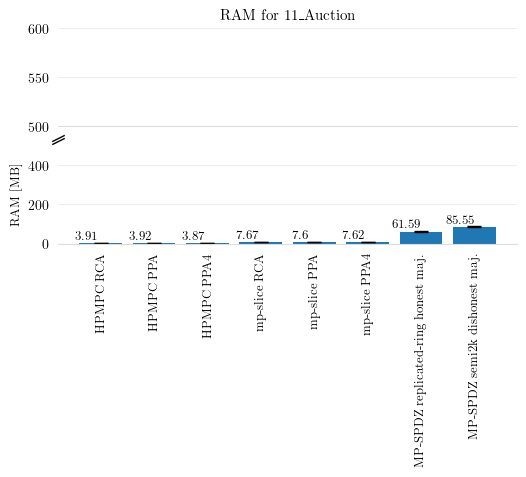

In [96]:
def plot_ram_bar(data,experiment,frameworks):
    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
    values=[]
    label=[]
    error=[]
    for i in range(len(data)):
        if data[i]['framework'][0] in ["HPMPC", "mp-slice"]:
            for function in data[i]['function'].unique():
                date = float(data[i].loc[(data[i]['function'] == function) & (data[i]['preprocess']==0), ['peakRAM(MiB)']].mean().iloc[0])
                err = float(data[i].loc[(data[i]['function'] == function) & (data[i]['preprocess']==0), ['peakRAM(MiB)']].std().iloc[0])
                values.append(round(date,2))
                error.append(round(err,2))
                label.append(frameworks[i] + ' honest majority' + str(function))
        elif data[i]['framework'][0] in ["MP-SPDZ","MOTION"]:
            for protocol in data[i]['protocol'].unique():
                if protocol not in ["ps-rep-field","ps-rep-ring","ps-rep-bin","sy-rep-field","malicious-rep-field"]:
                    date = float(data[i].loc[ (data[i]['protocol']==protocol), ['peakRAM(MiB)']].mean().iloc[0])
                    err = float(data[i].loc[ (data[i]['protocol']==protocol), ['peakRAM(MiB)']].std().iloc[0])
                    values.append(round(date,2))
                    error.append(round(err,2))
                    label.append(frameworks[i]+' '+str(protocol))
        else:
            date = float(data[i]['peakRAM(MiB)'].mean())
            err = float(data[i]['peakRAM(MiB)'].std())
            values.append(round(date,2))
            error.append(round(err,2))
            label.append(frameworks[i])
    #ax.set_yscale('log')  # Set y-axis as logarithmic
    print(label)
    # label = ['HPMPC honest majority', 'mp-slice honest majority', 'MP-SPDZ replicated-ring honest maj', 'MP-SPDZ semi2k dishonest maj.']
    label = ['HPMPC RCA', 'HPMPC PPA', 'HPMPC PPA4', 'mp-slice RCA', 'mp-slice PPA', 'mp-slice PPA4', 'MP-SPDZ replicated-ring honest maj.', 'MP-SPDZ semi2k dishonest maj.']
    bars=ax1.bar(label,values,yerr=error,capsize=5)
    bars2=ax2.bar(label,values,yerr=error,capsize=5)
    ax2.set_ylabel('RAM [MB]')
    ax1.set_title(f'RAM for {experiment}')
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.spines['left'].set_visible(False)
    ax1.spines['bottom'].set_color('#DDDDDD')
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    ax2.spines['left'].set_visible(False)
    ax2.spines['bottom'].set_color('#DDDDDD')

    # Second, remove the ticks as well.
    ax1.tick_params(bottom=False, left=False)
    ax2.tick_params(bottom=False, left=False)
    # Third, add a horizontal grid (but keep the vertical grid hidden).
    # Color the lines a light gray as well.
    ax1.set_axisbelow(True)
    ax1.yaxis.grid(True, color='#EEEEEE')
    ax1.xaxis.grid(False)
    ax2.set_axisbelow(True)
    ax2.yaxis.grid(True, color='#EEEEEE')
    ax2.xaxis.grid(False)
    # Rotate labels
    ax1.set_ylim(500,600)
    ax2.set_ylim(0,500)
    # Add values on top of bars
    for bar in bars2:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2 -0.26, yval  +7.5, yval, ha='center', va='bottom',weight='bold')

    # zoom-in / limit the view to different portions of the data
    ax1.tick_params(axis='y', labelsize=10)
    ax2.tick_params(axis='y', labelsize=10)
    d = .5  # proportion of vertical to horizontal extent of the slanted line
    kwargs = dict(marker=[(-1, -d), (1, d)], markersize=9,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
    ax1.plot([-0.15], transform=ax1.transAxes, **kwargs)
    ax2.plot([1.08], transform=ax2.transAxes, **kwargs)
    ax1.figure.set_size_inches(5.91, 2.8)
    ax2.figure.set_size_inches(5.91, 2.8)
    plt.xticks(rotation='vertical')
    plt.show()
plot_ram_bar(data,experiment,framworks)